[Reference](https://medium.com/@francescofranco_39234/finding-optimal-learning-rates-00cf4b3e44e3)

In [5]:
pip install keras_lr_finder

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
from keras_lr_finder import LRFinder

In [7]:
# Model configuration
batch_size = 250
img_width, img_height, img_num_channels = 28, 28, 1
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 5
start_lr = 0.0001
end_lr = 1
moving_average = 20

In [8]:
# Load MNIST data
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Cast numbers to float32 format and reshape data
input_train = input_train.astype('float32').reshape(input_train.shape[0], img_width, img_height, img_num_channels)
input_test = input_test.astype('float32').reshape(input_test.shape[0], img_width, img_height, img_num_channels)

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [10]:
# Determine tests you want to perform
tests = [
  (SGD(), 'SGD optimizer'),
  (Adam(), 'Adam optimizer'),
]

In [11]:
# Set containers for tests
test_learning_rates = []
test_losses = []
test_loss_changes = []
labels = []

In [12]:
# Perform each test
for test_optimizer, label in tests:

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=test_optimizer,
                metrics=['accuracy'])

  # Instantiate the Learning Rate Range Test / LR Finder
  lr_finder = LRFinder(model)

  # Perform the Learning Rate Range Test
  outputs = lr_finder.find(input_train, target_train, start_lr=start_lr, end_lr=end_lr, batch_size=batch_size, epochs=no_epochs)

  # Get values
  learning_rates  = lr_finder.lrs
  losses          = lr_finder.losses
  loss_changes = []

  # Compute smoothed loss changes
  # Inspired by Keras LR Finder: https://github.com/surmenok/keras_lr_finder/blob/master/keras_lr_finder/lr_finder.py
  for i in range(moving_average, len(learning_rates)):
    loss_changes.append((losses[i] - losses[i - moving_average]) / moving_average)

  # Append values to container
  test_learning_rates.append(learning_rates)
  test_losses.append(losses)
  test_loss_changes.append(loss_changes)
  labels.append(label)

Epoch 1/5
240/240 [==============================] - 55s 226ms/step - loss: 2.3047 - accuracy: 0.0582
Epoch 2/5
240/240 [==============================] - 44s 182ms/step - loss: 2.2757 - accuracy: 0.2026
Epoch 3/5
240/240 [==============================] - 45s 186ms/step - loss: 1.7157 - accuracy: 0.5850
Epoch 4/5
240/240 [==============================] - 45s 187ms/step - loss: 0.4524 - accuracy: 0.8598
Epoch 5/5
240/240 [==============================] - 50s 210ms/step - loss: 0.4039 - accuracy: 0.8791
Epoch 1/5
240/240 [==============================] - 52s 213ms/step - loss: 0.7034 - accuracy: 0.8279
Epoch 2/5
240/240 [==============================] - 51s 210ms/step - loss: 0.1038 - accuracy: 0.9675
Epoch 3/5
240/240 [==============================] - 50s 209ms/step - loss: 0.0817 - accuracy: 0.9749
Epoch 4/5
240/240 [==============================] - 17s 69ms/step - loss: 0.1726 - accuracy: 0.9528


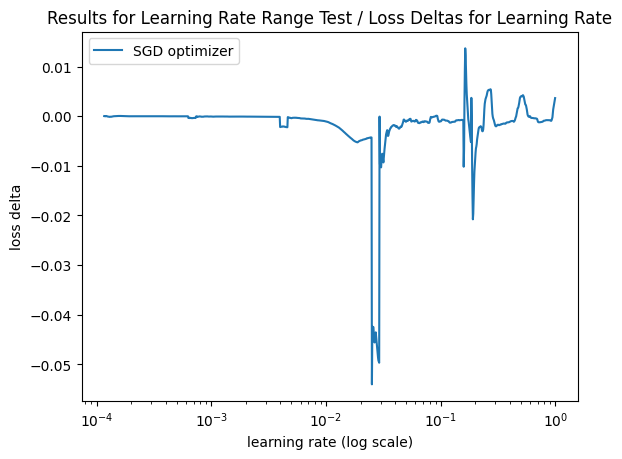

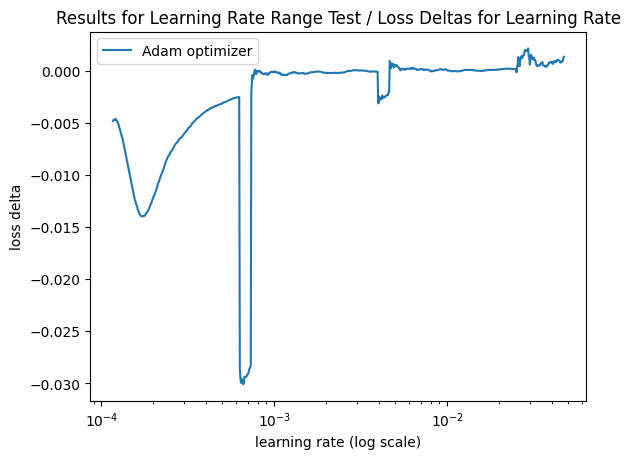

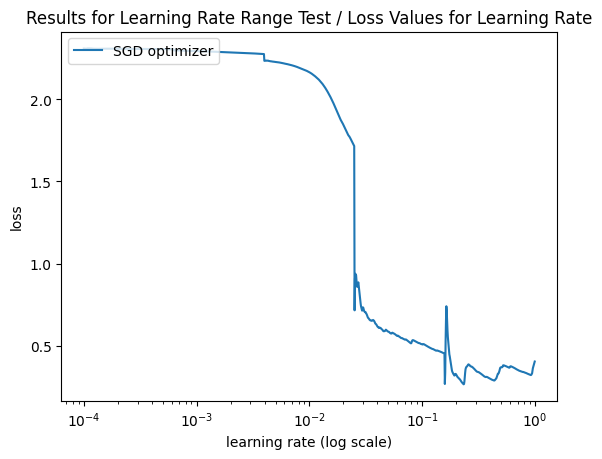

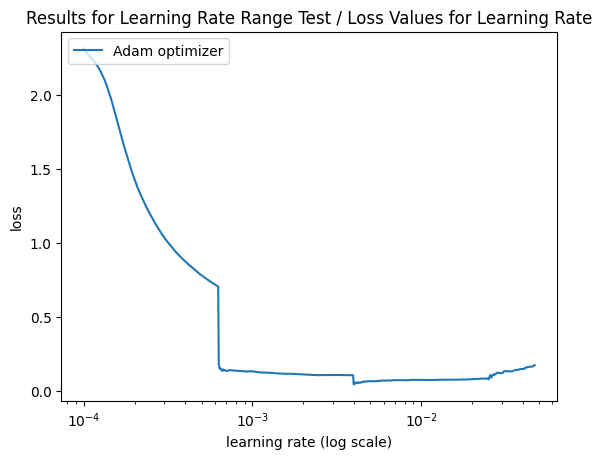

In [13]:
# Generate plot for Loss Deltas
for i in range(0, len(test_learning_rates)):
    plt.plot(test_learning_rates[i][moving_average:], test_loss_changes[i], label=labels[i])
    plt.xscale('log')
    plt.legend(loc='upper left')
    plt.ylabel('loss delta')
    plt.xlabel('learning rate (log scale)')
    plt.title('Results for Learning Rate Range Test / Loss Deltas for Learning Rate')
    plt.show()

# Generate plot for Loss Values
for i in range(0, len(test_learning_rates)):
    plt.plot(test_learning_rates[i], test_losses[i], label=labels[i])
    plt.xscale('log')
    plt.legend(loc='upper left')
    plt.ylabel('loss')
    plt.xlabel('learning rate (log scale)')
    plt.title('Results for Learning Rate Range Test / Loss Values for Learning Rate')
    plt.show()